# Fault Prediction usning AI/ML Classifiers

The dataa set 'source_dataset.csv' has 2000 rows, 30 colums.

The dependent variable is DepVariableMeterVlvPos(value >=1600 is fault active andd value < 1600 is fault inactive).

We need to build a classification model to find the fault.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('source_dataset.csv')

In [4]:
df.head()

Time  EngineLabel147PHMDiscrete-3a  AC1Lrm17Sspc4SspcOn-1a  \
0  30:00.0                  3.758097e+09                     1.0   
1  30:00.0                  3.758097e+09                     1.0   
2  30:00.1                  3.758097e+09                     1.0   
3  30:00.1                  3.758097e+09                     1.0   
4  30:00.2                  3.758097e+09                     1.0   

   n1DemandByTLA-3a  EngineLabel275CmcData-2a  EngineLabel356CmcData-2a  \
0         85.375000              2.151729e+09              2.147485e+09   
1         85.359375              2.151729e+09              2.147485e+09   
2         85.359375              2.151729e+09              2.147485e+09   
3         85.359375              2.151729e+09              2.147485e+09   
4         85.359375              2.151729e+09              2.147485e+09   

   EngineLabel355CmcData-4a  frontVibSnsrN1SO1-3a  \
0              2.147484e+09              0.070007   
1              2.147484e+09              0.070007   
2              2.147484e+09              0.070007   
3              2.147484e+09              0.070007   
4              2.147484e+09              0.070007   

   eng2P2t2HeaterCurrentStatus-1a  hpcSvaCmd-3a  ...  modifiedN1Climb2Ref-1a  \
0                             1.0     70.281250  ...               92.296875   
1                             1.0     70.265625  ...               92.296875   
2                             1.0     70.265625  ...               92.296875   
3                             1.0     70.265625  ...               92.281250   
4                             1.0     70.265625  ...               92.281250   

   rearVibSnsrFanSO1-1a  accVlvTorqMotorCurrent-3a  accVlvTorqMotorCurrent-1a  \
0              0.066162                  23.304688                  23.703125   
1              0.066162                  23.539062                  23.929688   
2              0.063477                  23.218750                  23.734375   
3              0.063477                  23.093750                  24.117188   
4              0.063477                  23.234375                  23.718750   

   auxOilPressure-3a  EngineLabel357CmcData-2a  frontVibSnsrLayShaftSO1-3a  \
0          51.109375                    1015.0                    0.032227   
1          51.109375                    1015.0                    0.032227   
2          51.109375                    1015.0                    0.032227   
3          51.109375                    1015.0                    0.032227   
4          51.109375                    1015.0                    0.032227   

   frontVibSnsrMaincabinpressPumpSO1-3a  EngineInternalTemp-3a  \
0                              0.004395               12.78125   
1                              0.004395               12.78125   
2                              0.004395               12.78125   
3                              0.004395               12.78125   
4                              0.004395               12.78125   

   DepVariableMeterVlvPos  
0                  1602.5  
1                  1600.5  
2                  1600.5  
3                  1600.5  
4                  1600.5  

[5 rows x 31 columns]

In [5]:
df.describe()

EngineLabel147PHMDiscrete-3a  AC1Lrm17Sspc4SspcOn-1a  n1DemandByTLA-3a  \
count                  1.999000e+03                  1999.0       1999.000000   
mean                   3.758097e+09                     1.0         85.764257   
std                    9.372154e+01                     0.0          0.386336   
min                    3.758097e+09                     1.0         84.734375   
25%                    3.758097e+09                     1.0         85.484375   
50%                    3.758097e+09                     1.0         85.609375   
75%                    3.758097e+09                     1.0         86.140625   
max                    3.758097e+09                     1.0         86.421875   

       EngineLabel275CmcData-2a  EngineLabel356CmcData-2a  \
count              1.999000e+03              1.999000e+03   
mean               2.151729e+09              2.147485e+09   
std                0.000000e+00              0.000000e+00   
min                2.151729e+09              2.147485e+09   
25%                2.151729e+09              2.147485e+09   
50%                2.151729e+09              2.147485e+09   
75%                2.151729e+09              2.147485e+09   
max                2.151729e+09              2.147485e+09   

       EngineLabel355CmcData-4a  frontVibSnsrN1SO1-3a  \
count              1.999000e+03           1999.000000   
mean               2.147484e+09              0.060587   
std                0.000000e+00              0.008430   
min                2.147484e+09              0.033142   
25%                2.147484e+09              0.056091   
50%                2.147484e+09              0.062439   
75%                2.147484e+09              0.066345   
max                2.147484e+09              0.077087   

       eng2P2t2HeaterCurrentStatus-1a  hpcSvaCmd-3a  EngineLabel360CmcData-2a  \
count                          1999.0   1999.000000              1.999000e+03   
mean                              1.0     70.820957              2.147484e+09   
std                               0.0      0.612988              0.000000e+00   
min                               1.0     69.140625              2.147484e+09   
25%                               1.0     70.343750              2.147484e+09   
50%                               1.0     70.640625              2.147484e+09   
75%                               1.0     71.351562              2.147484e+09   
max                               1.0     71.937500              2.147484e+09   

       ...  modifiedN1Climb2Ref-1a  rearVibSnsrFanSO1-1a  \
count  ...             1999.000000           1999.000000   
mean   ...               92.324326              0.067508   
std    ...                0.033048              0.002078   
min    ...               92.281250              0.062012   
25%    ...               92.296875              0.065918   
50%    ...               92.312500              0.067383   
75%    ...               92.359375              0.068848   
max    ...               92.375000              0.072510   

       accVlvTorqMotorCurrent-3a  accVlvTorqMotorCurrent-1a  \
count                1999.000000                1999.000000   
mean                   21.150087                  21.542213   
std                     1.563713                   1.765849   
min                    16.562500                  17.062500   
25%                    19.867188                  20.085938   
50%                    21.148438                  21.687500   
75%                    22.511719                  23.089844   
max                    23.968750                  24.546875   

       auxOilPressure-3a  EngineLabel357CmcData-2a  \
count        1999.000000                    1999.0   
mean           51.227934                    1015.0   
std             0.240525                       0.0   
min            50.546875                    1015.0   
25%            51.078125                    1015.0   
50%            51.218750                    1015.0

In [6]:
df.info

<bound method DataFrame.info of           Time  EngineLabel147PHMDiscrete-3a  AC1Lrm17Sspc4SspcOn-1a  \
0      30:00.0                  3.758097e+09                     1.0   
1      30:00.0                  3.758097e+09                     1.0   
2      30:00.1                  3.758097e+09                     1.0   
3      30:00.1                  3.758097e+09                     1.0   
4      30:00.2                  3.758097e+09                     1.0   
...        ...                           ...                     ...   
11988      NaN                           NaN                     NaN   
11989      NaN                           NaN                     NaN   
11990      NaN                           NaN                     NaN   
11991      NaN                           NaN                     NaN   
11992      NaN                           NaN                     NaN   

       n1DemandByTLA-3a  EngineLabel275CmcData-2a  EngineLabel356CmcData-2a  \
0             85.375000 

In [7]:
df.shape

(11993, 31)

As per the information above, the given data set has 11993 rows and 31 colums. But, as per the given problem statement, there are 2000 rows in actual data set. So, we need to identify the rows which are not usefule for the model building i.e., from 2001 to 11993.

In [8]:
df.drop(columns='Unnamed: 14',axis=1,inplace=True)

In [9]:
df.shape

(11993, 30)

In [15]:
df.isnull()  #to check and manage NULL values in a data frame.

Time  EngineLabel147PHMDiscrete-3a  AC1Lrm17Sspc4SspcOn-1a  \
0      False                         False                   False   
1      False                         False                   False   
2      False                         False                   False   
3      False                         False                   False   
4      False                         False                   False   
...      ...                           ...                     ...   
11988   True                          True                    True   
11989   True                          True                    True   
11990   True                          True                    True   
11991   True                          True                    True   
11992   True                          True                    True   

       n1DemandByTLA-3a  EngineLabel275CmcData-2a  EngineLabel356CmcData-2a  \
0                 False                     False                     False   
1                 False                     False                     False   
2                 False                     False                     False   
3                 False                     False                     False   
4                 False                     False                     False   
...                 ...                       ...                       ...   
11988              True                      True                      True   
11989              True                      True                      True   
11990              True                      True                      True   
11991              True                      True                      True   
11992              True                      True                      True   

       EngineLabel355CmcData-4a  frontVibSnsrN1SO1-3a  \
0                         False                 False   
1                         False                 False   
2                         False                 False   
3                         False                 False   
4                         False                 False   
...                         ...                   ...   
11988                      True                  True   
11989                      True                  True   
11990                      True                  True   
11991                      True                  True   
11992                      True                  True   

       eng2P2t2HeaterCurrentStatus-1a  hpcSvaCmd-3a  ...  \
0                               False         False  ...   
1                               False         False  ...   
2                               False         False  ...   
3                               False         False  ...   
4                               False         False  ...   
...                               ...           ...  ...   
11988                            True          True  ...   
11989                            True          True  ...   
11990                            True          True  ...   
11991                            True          True  ...   
11992                            True          True  ...   

       modifiedN1Climb2Ref-1a  rearVibSnsrFanSO1-1a  \
0                       False                 False   
1                       False                 False   
2                       False                 False   
3                       False                 False   
4                       False                 False   
...                       ...                   ...   
11988                    True                  True   
11989                    True                  True   
11990                    True                  True   
11991                    True                  True   
11992                    True                  True   

       accVlvTorqMotorCurrent-3a  accVlvTorqMotorCurrent-1a  \
0                          False                      False   
1                        

In [18]:
df.dropna(axis=0,how='all',inplace=True)

In [19]:
df.shape

(1999, 30)

## Copying the Dataset

In [20]:
df1 = df

In [21]:
df1.shape

(1999, 30)

In [22]:
df1.head()

Time  EngineLabel147PHMDiscrete-3a  AC1Lrm17Sspc4SspcOn-1a  \
0  30:00.0                  3.758097e+09                     1.0   
1  30:00.0                  3.758097e+09                     1.0   
2  30:00.1                  3.758097e+09                     1.0   
3  30:00.1                  3.758097e+09                     1.0   
4  30:00.2                  3.758097e+09                     1.0   

   n1DemandByTLA-3a  EngineLabel275CmcData-2a  EngineLabel356CmcData-2a  \
0         85.375000              2.151729e+09              2.147485e+09   
1         85.359375              2.151729e+09              2.147485e+09   
2         85.359375              2.151729e+09              2.147485e+09   
3         85.359375              2.151729e+09              2.147485e+09   
4         85.359375              2.151729e+09              2.147485e+09   

   EngineLabel355CmcData-4a  frontVibSnsrN1SO1-3a  \
0              2.147484e+09              0.070007   
1              2.147484e+09              0.070007   
2              2.147484e+09              0.070007   
3              2.147484e+09              0.070007   
4              2.147484e+09              0.070007   

   eng2P2t2HeaterCurrentStatus-1a  hpcSvaCmd-3a  ...  modifiedN1Climb2Ref-1a  \
0                             1.0     70.281250  ...               92.296875   
1                             1.0     70.265625  ...               92.296875   
2                             1.0     70.265625  ...               92.296875   
3                             1.0     70.265625  ...               92.281250   
4                             1.0     70.265625  ...               92.281250   

   rearVibSnsrFanSO1-1a  accVlvTorqMotorCurrent-3a  accVlvTorqMotorCurrent-1a  \
0              0.066162                  23.304688                  23.703125   
1              0.066162                  23.539062                  23.929688   
2              0.063477                  23.218750                  23.734375   
3              0.063477                  23.093750                  24.117188   
4              0.063477                  23.234375                  23.718750   

   auxOilPressure-3a  EngineLabel357CmcData-2a  frontVibSnsrLayShaftSO1-3a  \
0          51.109375                    1015.0                    0.032227   
1          51.109375                    1015.0                    0.032227   
2          51.109375                    1015.0                    0.032227   
3          51.109375                    1015.0                    0.032227   
4          51.109375                    1015.0                    0.032227   

   frontVibSnsrMaincabinpressPumpSO1-3a  EngineInternalTemp-3a  \
0                              0.004395               12.78125   
1                              0.004395               12.78125   
2                              0.004395               12.78125   
3                              0.004395               12.78125   
4                              0.004395               12.78125   

   DepVariableMeterVlvPos  
0                  1602.5  
1                  1600.5  
2                  1600.5  
3                  1600.5  
4                  1600.5  

[5 rows x 30 columns]

In [25]:
df1.describe().T

count          mean         std  \
EngineLabel147PHMDiscrete-3a          1999.0  3.758097e+09   93.721538   
AC1Lrm17Sspc4SspcOn-1a                1999.0  1.000000e+00    0.000000   
n1DemandByTLA-3a                      1999.0  8.576426e+01    0.386336   
EngineLabel275CmcData-2a              1999.0  2.151729e+09    0.000000   
EngineLabel356CmcData-2a              1999.0  2.147485e+09    0.000000   
EngineLabel355CmcData-4a              1999.0  2.147484e+09    0.000000   
frontVibSnsrN1SO1-3a                  1999.0  6.058653e-02    0.008430   
eng2P2t2HeaterCurrentStatus-1a        1999.0  1.000000e+00    0.000000   
hpcSvaCmd-3a                          1999.0  7.082096e+01    0.612988   
EngineLabel360CmcData-2a              1999.0  2.147484e+09    0.000000   
cabinpressFilterDeltaPress-3a         1999.0  9.520096e+00    0.042419   
oilPressure-1a                        1999.0  1.000914e+02    0.383539   
EngineLabel270CmcData-3a              1999.0  1.342265e+08    1.941966   
EngineLabel353CmcData-3a              1999.0  7.270000e+02    0.000000   
elecHotBatt1BusVoltStatus-1a          1999.0  1.000000e+00    0.000000   
EngineLabel354CmcData-2a              1999.0  8.230000e+02    0.000000   
EngineLabel274CmcData-3a              1999.0  2.282751e+09    0.000000   
nFanVibLevel-1a                       1999.0  1.250000e-01    0.000000   
EngineLabel364CmcData-4a              1999.0  1.515871e+09    0.000000   
modifiedN1Climb2Ref-1a                1999.0  9.232433e+01    0.033048   
rearVibSnsrFanSO1-1a                  1999.0  6.750812e-02    0.002078   
accVlvTorqMotorCurrent-3a             1999.0  2.115009e+01    1.563713   
accVlvTorqMotorCurrent-1a             1999.0  2.154221e+01    1.765849   
auxOilPressure-3a                     1999.0  5.122793e+01    0.240525   
EngineLabel357CmcData-2a              1999.0  1.015000e+03    0.000000   
frontVibSnsrLayShaftSO1-3a            1999.0  3.035354e-02    0.001389   
frontVibSnsrMaincabinpressPumpSO1-3a  1999.0  4.749687e-03    0.002108   
EngineInternalTemp-3a                 1999.0  1.256067e+01    0.132640   
DepVariableMeterVlvPos                1999.0  1.586986e+03  123.226505   

                                               min           25%  \
EngineLabel147PHMDiscrete-3a          3.758097e+09  3.758097e+09   
AC1Lrm17Sspc4SspcOn-1a                1.000000e+00  1.000000e+00   
n1DemandByTLA-3a                      8.473438e+01  8.548438e+01   
EngineLabel275CmcData-2a              2.151729e+09  2.151729e+09   
EngineLabel356CmcData-2a              2.147485e+09  2.147485e+09   
EngineLabel355CmcData-4a              2.147484e+09  2.147484e+09   
frontVibSnsrN1SO1-3a                  3.314212e-02  5.609136e-02   
eng2P2t2HeaterCurrentStatus-1a        1.000000e+00  1.000000e+00   
hpcSvaCmd-3a                          6.914062e+01  7.034375e+01   
EngineLabel360CmcData-2a              2.147484e+09  2.147484e+09   
cabinpressFilterDeltaPress-3a         9.398438e+00  9.492188e+00   
oilPressure-1a                        9.929688e+01  9.979688e+01   
EngineLabel270CmcData-3a              1.342264e+08  1.342265e+08   
EngineLabel353CmcData-3a              7.270000e+02  7.270000e+02   
elecHotBatt1BusVoltStatus-1a          1.000000e+00  1.000000e+00   
EngineLabel354CmcData-2a              8.230000e+02  8.230000e+02   
EngineLabel274CmcData-3a              2.282751e+09  2.282751e+09   
nFanVibLevel-1a                       1.250000e-01  1.250000e-01   
EngineLabel364CmcData-4a              1.515871e+09  1.515871e+09   
modifiedN1Climb2Ref-1a                9.228125e+01  9.229688e+01   
rearVibSnsrFanSO1-1a                  6.201172e-02  6.591797e-02   
accVlvTorqMotorCurrent-3a             1.656250e+01  1.986719e+01   
accVlvTorqMotorCurrent-1a             1.706250e+01  2.008594e+01   
auxOilPressure-3a                     5.054688e+01  5.107812e+01   
EngineLabel357CmcData-2a              1.015000e+03  1.015000e+03   
frontVibSnsrLayShaftSO1-3a            2.685546e-02

### We can notice that some columns have 0 has their standard deviation which means they dont add much value to the dataset. Those can be removed

In [26]:
missing_values=df1.isnull().sum()/df1.shape[0]*100
missing_values

Time                                    0.0
EngineLabel147PHMDiscrete-3a            0.0
AC1Lrm17Sspc4SspcOn-1a                  0.0
n1DemandByTLA-3a                        0.0
EngineLabel275CmcData-2a                0.0
EngineLabel356CmcData-2a                0.0
EngineLabel355CmcData-4a                0.0
frontVibSnsrN1SO1-3a                    0.0
eng2P2t2HeaterCurrentStatus-1a          0.0
hpcSvaCmd-3a                            0.0
EngineLabel360CmcData-2a                0.0
cabinpressFilterDeltaPress-3a           0.0
oilPressure-1a                          0.0
EngineLabel270CmcData-3a                0.0
EngineLabel353CmcData-3a                0.0
elecHotBatt1BusVoltStatus-1a            0.0
EngineLabel354CmcData-2a                0.0
EngineLabel274CmcData-3a                0.0
nFanVibLevel-1a                         0.0
EngineLabel364CmcData-4a                0.0
modifiedN1Climb2Ref-1a                  0.0
rearVibSnsrFanSO1-1a                    0.0
accVlvTorqMotorCurrent-3a       

#### We can see that there are no missing values in the dataset.

## Making Time as an Index

In [27]:
df1['Time'] = pd.to_datetime(df1['Time'], format='%M:%S.%f')

In [28]:
df1.set_index(keys='Time',inplace=True)

In [29]:
df1.head()

EngineLabel147PHMDiscrete-3a  AC1Lrm17Sspc4SspcOn-1a  \
Time                                                                            
1900-01-01 00:30:00.000                  3.758097e+09                     1.0   
1900-01-01 00:30:00.000                  3.758097e+09                     1.0   
1900-01-01 00:30:00.100                  3.758097e+09                     1.0   
1900-01-01 00:30:00.100                  3.758097e+09                     1.0   
1900-01-01 00:30:00.200                  3.758097e+09                     1.0   

                         n1DemandByTLA-3a  EngineLabel275CmcData-2a  \
Time                                                                  
1900-01-01 00:30:00.000         85.375000              2.151729e+09   
1900-01-01 00:30:00.000         85.359375              2.151729e+09   
1900-01-01 00:30:00.100         85.359375              2.151729e+09   
1900-01-01 00:30:00.100         85.359375              2.151729e+09   
1900-01-01 00:30:00.200         85.359375              2.151729e+09   

                         EngineLabel356CmcData-2a  EngineLabel355CmcData-4a  \
Time                                                                          
1900-01-01 00:30:00.000              2.147485e+09              2.147484e+09   
1900-01-01 00:30:00.000              2.147485e+09              2.147484e+09   
1900-01-01 00:30:00.100              2.147485e+09              2.147484e+09   
1900-01-01 00:30:00.100              2.147485e+09              2.147484e+09   
1900-01-01 00:30:00.200              2.147485e+09              2.147484e+09   

                         frontVibSnsrN1SO1-3a  eng2P2t2HeaterCurrentStatus-1a  \
Time                                                                            
1900-01-01 00:30:00.000              0.070007                             1.0   
1900-01-01 00:30:00.000              0.070007                             1.0   
1900-01-01 00:30:00.100              0.070007                             1.0   
1900-01-01 00:30:00.100              0.070007                             1.0   
1900-01-01 00:30:00.200              0.070007                             1.0   

                         hpcSvaCmd-3a  EngineLabel360CmcData-2a  ...  \
Time                                                             ...   
1900-01-01 00:30:00.000     70.281250              2.147484e+09  ...   
1900-01-01 00:30:00.000     70.265625              2.147484e+09  ...   
1900-01-01 00:30:00.100     70.265625              2.147484e+09  ...   
1900-01-01 00:30:00.100     70.265625              2.147484e+09  ...   
1900-01-01 00:30:00.200     70.265625              2.147484e+09  ...   

                         modifiedN1Climb2Ref-1a  rearVibSnsrFanSO1-1a  \
Time                                                                    
1900-01-01 00:30:00.000               92.296875              0.066162   
1900-01-01 00:30:00.000               92.296875              0.066162   
1900-01-01 00:30:00.100               92.296875              0.063477   
1900-01-01 00:30:00.100               92.281250              0.063477   
1900-01-01 00:30:00.200               92.281250              0.063477   

                         accVlvTorqMotorCurrent-3a  accVlvTorqMotorCurrent-1a  \
Time                                                                            
1900-01-01 00:30:00.000                  23.304688                  23.703125   
1900-01-01 00:30:00.000                  23.539062                  23.929688   
1900-01-01 00:30:00.100                  23.218750                  23.734375   
1900-01-01 00:30:00.100                  23.093750                  24.117188   
1900-01-01 00:30:00.200                  23.234375                  23.718750   

                         auxOilPressure-3a  EngineLabel357CmcData-2a  \
Time                                                                   
1900-01-01 00:30:00.000          51.109375                    1015.0   
1900-01-01 00:30:00.000          51.

### Graphical Analysis to check the correlation and spread of data

Check the correlation of independent variables on the target variable 'DataVariableMeterVlvPos'

This step is necessary to be performed to know which parameters are not having any effect on the target variable.

In such case where the correlation is very week as noticed in the plot, we can drop those parameters.

In [30]:
col1=df1.loc[:,['EngineLabel147PHMDiscrete-3a',
 'AC1Lrm17Sspc4SspcOn-1a',
 'n1DemandByTLA-3a',
 'EngineLabel275CmcData-2a',
 'EngineLabel356CmcData-2a',
 'EngineLabel355CmcData-4a',
 'frontVibSnsrN1SO1-3a',
 'eng2P2t2HeaterCurrentStatus-1a',
 'hpcSvaCmd-3a',
 'EngineLabel360CmcData-2a',
 'cabinpressFilterDeltaPress-3a',
 'oilPressure-1a',
 'EngineLabel270CmcData-3a',
 'EngineLabel353CmcData-3a',
 'elecHotBatt1BusVoltStatus-1a',
 'EngineLabel354CmcData-2a',
 'EngineLabel274CmcData-3a',
 'nFanVibLevel-1a',
 'EngineLabel364CmcData-4a',
 'modifiedN1Climb2Ref-1a',
 'rearVibSnsrFanSO1-1a',
 'accVlvTorqMotorCurrent-3a',
 'accVlvTorqMotorCurrent-1a',
 'auxOilPressure-3a',
 'EngineLabel357CmcData-2a',
 'frontVibSnsrLayShaftSO1-3a',
 'frontVibSnsrMaincabinpressPumpSO1-3a',
 'EngineInternalTemp-3a']]

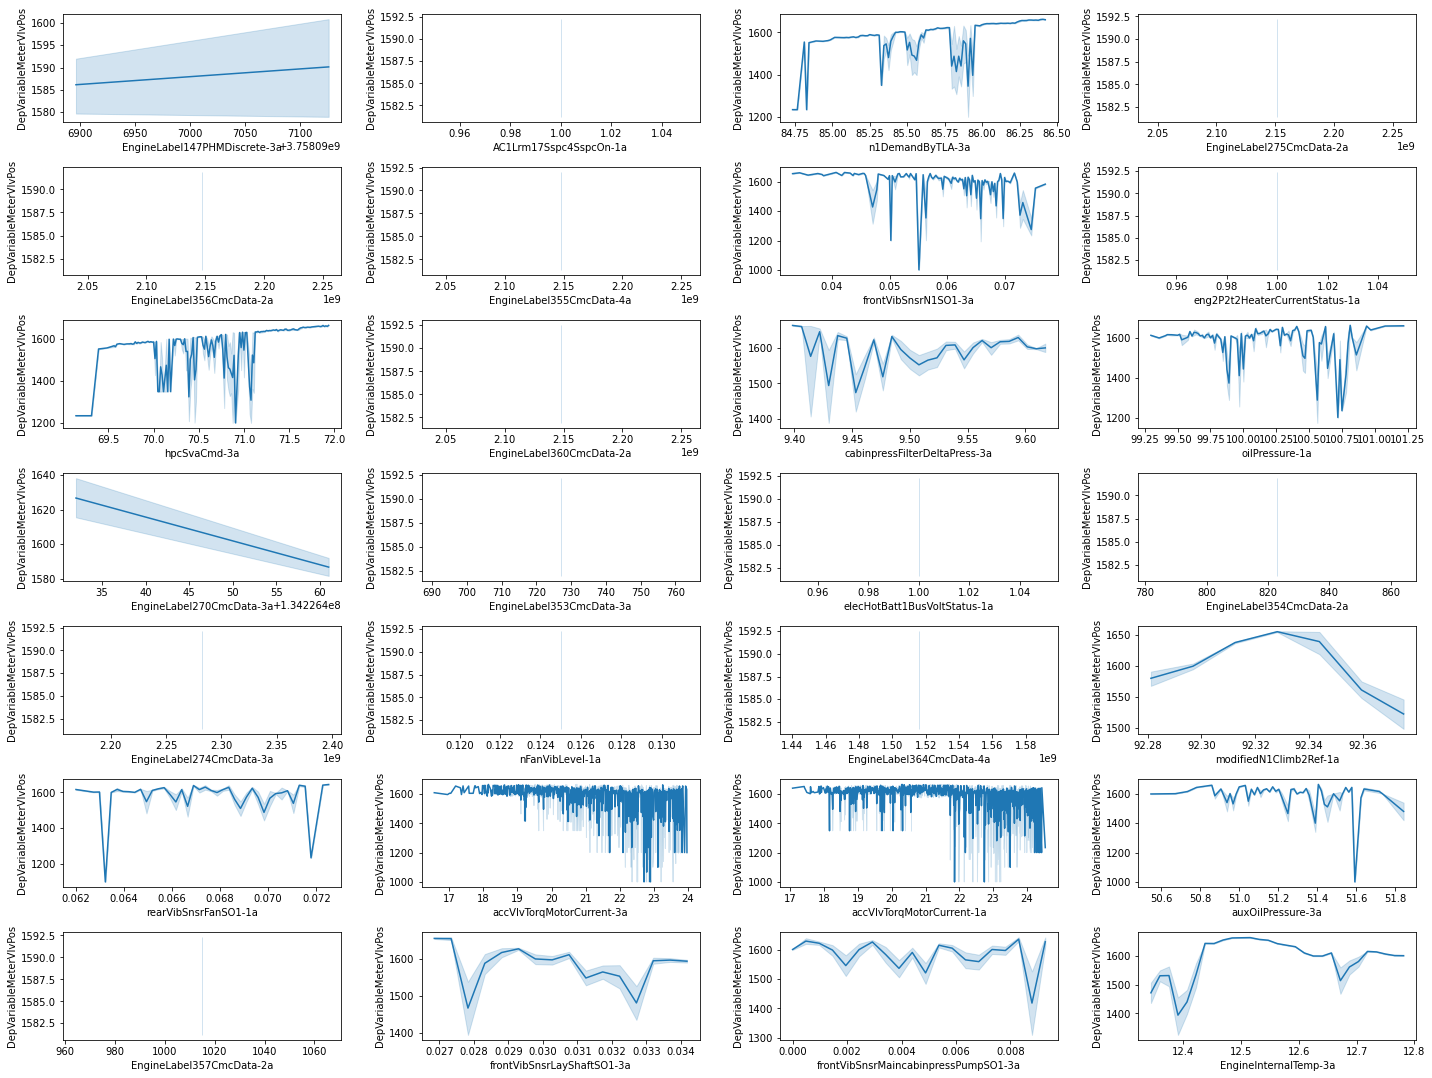

In [37]:
fig,ax=plt.subplots(nrows=7,ncols=4,figsize=(20,15))
for variable,subplot in  zip(col1.columns,ax.flatten()):
    
    sns.lineplot(x=df1[variable],y=df1['DepVariableMeterVlvPos'],ax=subplot)
    
    plt.tight_layout()

#### We can infer that some columns in the graphical representation above doesn't contribute towards the target variable DepVariablMEterVlvPos

### Dropping the columns which are not having any impact

In [38]:
df1.drop(columns=['EngineLabel274CmcData-3a',
 'nFanVibLevel-1a',
 'EngineLabel364CmcData-4a','EngineLabel357CmcData-2a','AC1Lrm17Sspc4SspcOn-1a','EngineLabel275CmcData-2a',
 'EngineLabel356CmcData-2a',
 'EngineLabel355CmcData-4a','eng2P2t2HeaterCurrentStatus-1a','EngineLabel360CmcData-2a','EngineLabel353CmcData-3a',
 'elecHotBatt1BusVoltStatus-1a',
 'EngineLabel354CmcData-2a'
],axis=1,inplace=True)

In [39]:
df1.shape

(1999, 16)

In [40]:
#Adding a column called Fault_Active to split the faults into classes

df1.loc[df1['DepVariableMeterVlvPos'] > 1600, 'Fault_Active'] = 1
df1.loc[df1['DepVariableMeterVlvPos'] <= 1600, 'Fault_Active'] = 0

In [41]:
df1.head()

EngineLabel147PHMDiscrete-3a  n1DemandByTLA-3a  \
Time                                                                      
1900-01-01 00:30:00.000                  3.758097e+09         85.375000   
1900-01-01 00:30:00.000                  3.758097e+09         85.359375   
1900-01-01 00:30:00.100                  3.758097e+09         85.359375   
1900-01-01 00:30:00.100                  3.758097e+09         85.359375   
1900-01-01 00:30:00.200                  3.758097e+09         85.359375   

                         frontVibSnsrN1SO1-3a  hpcSvaCmd-3a  \
Time                                                          
1900-01-01 00:30:00.000              0.070007     70.281250   
1900-01-01 00:30:00.000              0.070007     70.265625   
1900-01-01 00:30:00.100              0.070007     70.265625   
1900-01-01 00:30:00.100              0.070007     70.265625   
1900-01-01 00:30:00.200              0.070007     70.265625   

                         cabinpressFilterDeltaPress-3a  oilPressure-1a  \
Time                                                                     
1900-01-01 00:30:00.000                       9.507812       99.703125   
1900-01-01 00:30:00.000                       9.507812       99.703125   
1900-01-01 00:30:00.100                       9.476562       99.937500   
1900-01-01 00:30:00.100                       9.476562       99.937500   
1900-01-01 00:30:00.200                       9.476562       99.937500   

                         EngineLabel270CmcData-3a  modifiedN1Climb2Ref-1a  \
Time                                                                        
1900-01-01 00:30:00.000               134226461.0               92.296875   
1900-01-01 00:30:00.000               134226461.0               92.296875   
1900-01-01 00:30:00.100               134226461.0               92.296875   
1900-01-01 00:30:00.100               134226461.0               92.281250   
1900-01-01 00:30:00.200               134226461.0               92.281250   

                         rearVibSnsrFanSO1-1a  accVlvTorqMotorCurrent-3a  \
Time                                                                       
1900-01-01 00:30:00.000              0.066162                  23.304688   
1900-01-01 00:30:00.000              0.066162                  23.539062   
1900-01-01 00:30:00.100              0.063477                  23.218750   
1900-01-01 00:30:00.100              0.063477                  23.093750   
1900-01-01 00:30:00.200              0.063477                  23.234375   

                         accVlvTorqMotorCurrent-1a  auxOilPressure-3a  \
Time                                                                    
1900-01-01 00:30:00.000                  23.703125          51.109375   
1900-01-01 00:30:00.000                  23.929688          51.109375   
1900-01-01 00:30:00.100                  23.734375          51.109375   
1900-01-01 00:30:00.100                  24.117188          51.109375   
1900-01-01 00:30:00.200                  23.718750          51.109375   

                         frontVibSnsrLayShaftSO1-3a  \
Time                                                  
1900-01-01 00:30:00.000                    0.032227   
1900-01-01 00:30:00.000                    0.032227   
1900-01-01 00:30:00.100                    0.032227   
1900-01-01 00:30:00.100                    0.032227   
1900-01-01 00:30:00.200                    0.032227   

                         frontVibSnsrMaincabinpressPumpSO1-3a  \
Time                                                            
1900-01-01 00:30:00.000                              0.004395   
1900-01-01 00:30:00.000                              0.004395   
1900-01-01 00:30:00.100                              0.004395   
1900-01-01 00:30:00.100                              0.004395   
1900-01-01 00:30:00.200                              0.004395   

                         EngineInternalTemp-3a  DepVariableMeterVlvPos  \
Time                                 

In [42]:
df1.describe().T

count          mean         std  \
EngineLabel147PHMDiscrete-3a          1999.0  3.758097e+09   93.721538   
n1DemandByTLA-3a                      1999.0  8.576426e+01    0.386336   
frontVibSnsrN1SO1-3a                  1999.0  6.058653e-02    0.008430   
hpcSvaCmd-3a                          1999.0  7.082096e+01    0.612988   
cabinpressFilterDeltaPress-3a         1999.0  9.520096e+00    0.042419   
oilPressure-1a                        1999.0  1.000914e+02    0.383539   
EngineLabel270CmcData-3a              1999.0  1.342265e+08    1.941966   
modifiedN1Climb2Ref-1a                1999.0  9.232433e+01    0.033048   
rearVibSnsrFanSO1-1a                  1999.0  6.750812e-02    0.002078   
accVlvTorqMotorCurrent-3a             1999.0  2.115009e+01    1.563713   
accVlvTorqMotorCurrent-1a             1999.0  2.154221e+01    1.765849   
auxOilPressure-3a                     1999.0  5.122793e+01    0.240525   
frontVibSnsrLayShaftSO1-3a            1999.0  3.035354e-02    0.001389   
frontVibSnsrMaincabinpressPumpSO1-3a  1999.0  4.749687e-03    0.002108   
EngineInternalTemp-3a                 1999.0  1.256067e+01    0.132640   
DepVariableMeterVlvPos                1999.0  1.586986e+03  123.226505   
Fault_Active                          1999.0  7.443722e-01    0.436323   

                                               min           25%  \
EngineLabel147PHMDiscrete-3a          3.758097e+09  3.758097e+09   
n1DemandByTLA-3a                      8.473438e+01  8.548438e+01   
frontVibSnsrN1SO1-3a                  3.314212e-02  5.609136e-02   
hpcSvaCmd-3a                          6.914062e+01  7.034375e+01   
cabinpressFilterDeltaPress-3a         9.398438e+00  9.492188e+00   
oilPressure-1a                        9.929688e+01  9.979688e+01   
EngineLabel270CmcData-3a              1.342264e+08  1.342265e+08   
modifiedN1Climb2Ref-1a                9.228125e+01  9.229688e+01   
rearVibSnsrFanSO1-1a                  6.201172e-02  6.591797e-02   
accVlvTorqMotorCurrent-3a             1.656250e+01  1.986719e+01   
accVlvTorqMotorCurrent-1a             1.706250e+01  2.008594e+01   
auxOilPressure-3a                     5.054688e+01  5.107812e+01   
frontVibSnsrLayShaftSO1-3a            2.685546e-02  2.929686e-02   
frontVibSnsrMaincabinpressPumpSO1-3a  0.000000e+00  2.929686e-03   
EngineInternalTemp-3a                 1.234375e+01  1.243750e+01   
DepVariableMeterVlvPos                1.001000e+03  1.600000e+03   
Fault_Active                          0.000000e+00  0.000000e+00   

                                               50%           75%           max  
EngineLabel147PHMDiscrete-3a          3.758097e+09  3.758097e+09  3.758097e+09  
n1DemandByTLA-3a                      8.560938e+01  8.614062e+01  8.642188e+01  
frontVibSnsrN1SO1-3a                  6.243902e-02  6.634528e-02  7.708748e-02  
hpcSvaCmd-3a                          7.064062e+01  7.135156e+01  7.193750e+01  
cabinpressFilterDeltaPress-3a         9.523438e+00  9.546875e+00  9.617188e+00  
oilPressure-1a                        1.000781e+02  1.003594e+02  1.012188e+02  
EngineLabel270CmcData-3a              1.342265e+08  1.342265e+08  1.342265e+08  
modifiedN1Climb2Ref-1a                9.231250e+01  9.235938e+01  9.237500e+01  
rearVibSnsrFanSO1-1a                  6.738281e-02  6.884766e-02  7.250977e-02  
accVlvTorqMotorCurrent-3a             2.114844e+01  2.251172e+01  2.396875e+01  
accVlvTorqMotorCurrent-1a             2.168750e+01  2.308984e+01  2.454688e+01  
auxOilPressure-3a                     5.121875e+01  5.137500e+01  5.184375e+01  
frontVibSnsrLayShaftSO1-3a            3.027342e-02  3.124998e-02  3.417967e-02  
frontVibSnsrMaincabinpressPumpSO1-3a  4.882810e-03  6.347653e-03  9.277339e-03  
EngineInternalTemp-3a                 1.256250e+01  1.267188e+01  1.278125e+01  
DepVariableMeterVlvPos                1.614000e+03  1.642000e+03  1.667500e+03  
Fault_Active                          1.000000e+00  1.000000e+00  1.000000e+00

In [44]:
df1.shape

(1999, 17)

In [45]:
# we can drop the DepVariableMeterVlvPos as we have classified the values to class 0 for <=1600 and class 1 for >1600

df1.drop(['DepVariableMeterVlvPos'],axis=1,inplace=True)

df1.shape

(1999, 16)

<AxesSubplot:xlabel='Fault_Active', ylabel='count'>

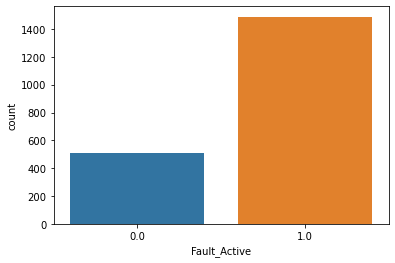

In [46]:
sns.countplot('Fault_Active',data=df1)

In [47]:
df1['Fault_Active'] = df1['Fault_Active'].astype(object)
df1['Fault_Active'].dtypes

dtype('O')

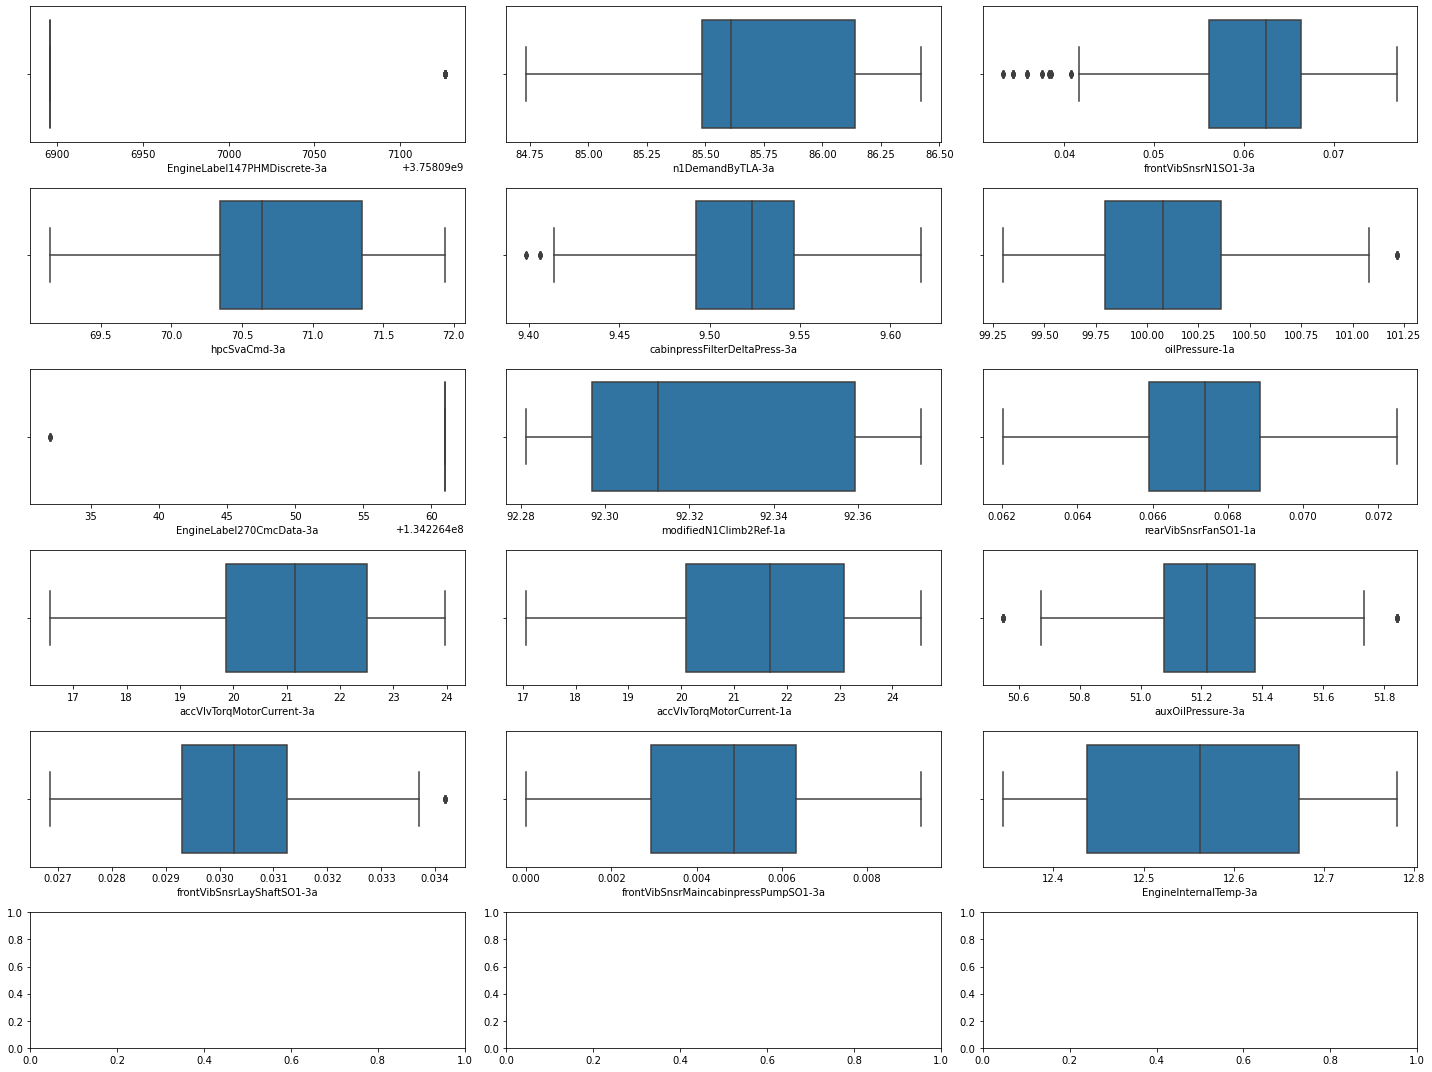

In [48]:
# checking for outliers
col2=df1.loc[:,['EngineLabel147PHMDiscrete-3a', 'n1DemandByTLA-3a',
       'frontVibSnsrN1SO1-3a', 'hpcSvaCmd-3a', 'cabinpressFilterDeltaPress-3a',
       'oilPressure-1a', 'EngineLabel270CmcData-3a', 'modifiedN1Climb2Ref-1a',
       'rearVibSnsrFanSO1-1a', 'accVlvTorqMotorCurrent-3a',
       'accVlvTorqMotorCurrent-1a', 'auxOilPressure-3a',
       'frontVibSnsrLayShaftSO1-3a', 'frontVibSnsrMaincabinpressPumpSO1-3a',
       'EngineInternalTemp-3a',]]
fig,ax=plt.subplots(nrows=6,ncols=3,figsize=(20,15))

for variable,subplot in  zip(col2.columns,ax.flatten()):
    
    sns.boxplot(x=df1[variable],ax=subplot)
    
    plt.tight_layout()

In [49]:
df1.dtypes==object

EngineLabel147PHMDiscrete-3a            False
n1DemandByTLA-3a                        False
frontVibSnsrN1SO1-3a                    False
hpcSvaCmd-3a                            False
cabinpressFilterDeltaPress-3a           False
oilPressure-1a                          False
EngineLabel270CmcData-3a                False
modifiedN1Climb2Ref-1a                  False
rearVibSnsrFanSO1-1a                    False
accVlvTorqMotorCurrent-3a               False
accVlvTorqMotorCurrent-1a               False
auxOilPressure-3a                       False
frontVibSnsrLayShaftSO1-3a              False
frontVibSnsrMaincabinpressPumpSO1-3a    False
EngineInternalTemp-3a                   False
Fault_Active                             True
dtype: bool

### Model Building

**We can notice that some columns are havig outliers and as outlier treatment is removing a huge chunk of data, we perform Scaling technique called Robust Scaler to normalize the values. Robust Scaling technique also deals with outliers optimize the dataset. As performing outlier treatment is removing a large chunk of data we are proceeding with Robust Scaler technique**

In [51]:
from sklearn.preprocessing import RobustScaler

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [52]:
numerical = df1.select_dtypes(include = [np.number])

# display numerical features
numerical.columns

Index(['EngineLabel147PHMDiscrete-3a', 'n1DemandByTLA-3a',
       'frontVibSnsrN1SO1-3a', 'hpcSvaCmd-3a', 'cabinpressFilterDeltaPress-3a',
       'oilPressure-1a', 'EngineLabel270CmcData-3a', 'modifiedN1Climb2Ref-1a',
       'rearVibSnsrFanSO1-1a', 'accVlvTorqMotorCurrent-3a',
       'accVlvTorqMotorCurrent-1a', 'auxOilPressure-3a',
       'frontVibSnsrLayShaftSO1-3a', 'frontVibSnsrMaincabinpressPumpSO1-3a',
       'EngineInternalTemp-3a'],
      dtype='object')

In [53]:
numerical.head()

EngineLabel147PHMDiscrete-3a  n1DemandByTLA-3a  \
Time                                                                      
1900-01-01 00:30:00.000                  3.758097e+09         85.375000   
1900-01-01 00:30:00.000                  3.758097e+09         85.359375   
1900-01-01 00:30:00.100                  3.758097e+09         85.359375   
1900-01-01 00:30:00.100                  3.758097e+09         85.359375   
1900-01-01 00:30:00.200                  3.758097e+09         85.359375   

                         frontVibSnsrN1SO1-3a  hpcSvaCmd-3a  \
Time                                                          
1900-01-01 00:30:00.000              0.070007     70.281250   
1900-01-01 00:30:00.000              0.070007     70.265625   
1900-01-01 00:30:00.100              0.070007     70.265625   
1900-01-01 00:30:00.100              0.070007     70.265625   
1900-01-01 00:30:00.200              0.070007     70.265625   

                         cabinpressFilterDeltaPress-3a  oilPressure-1a  \
Time                                                                     
1900-01-01 00:30:00.000                       9.507812       99.703125   
1900-01-01 00:30:00.000                       9.507812       99.703125   
1900-01-01 00:30:00.100                       9.476562       99.937500   
1900-01-01 00:30:00.100                       9.476562       99.937500   
1900-01-01 00:30:00.200                       9.476562       99.937500   

                         EngineLabel270CmcData-3a  modifiedN1Climb2Ref-1a  \
Time                                                                        
1900-01-01 00:30:00.000               134226461.0               92.296875   
1900-01-01 00:30:00.000               134226461.0               92.296875   
1900-01-01 00:30:00.100               134226461.0               92.296875   
1900-01-01 00:30:00.100               134226461.0               92.281250   
1900-01-01 00:30:00.200               134226461.0               92.281250   

                         rearVibSnsrFanSO1-1a  accVlvTorqMotorCurrent-3a  \
Time                                                                       
1900-01-01 00:30:00.000              0.066162                  23.304688   
1900-01-01 00:30:00.000              0.066162                  23.539062   
1900-01-01 00:30:00.100              0.063477                  23.218750   
1900-01-01 00:30:00.100              0.063477                  23.093750   
1900-01-01 00:30:00.200              0.063477                  23.234375   

                         accVlvTorqMotorCurrent-1a  auxOilPressure-3a  \
Time                                                                    
1900-01-01 00:30:00.000                  23.703125          51.109375   
1900-01-01 00:30:00.000                  23.929688          51.109375   
1900-01-01 00:30:00.100                  23.734375          51.109375   
1900-01-01 00:30:00.100                  24.117188          51.109375   
1900-01-01 00:30:00.200                  23.718750          51.109375   

                         frontVibSnsrLayShaftSO1-3a  \
Time                                                  
1900-01-01 00:30:00.000                    0.032227   
1900-01-01 00:30:00.000                    0.032227   
1900-01-01 00:30:00.100                    0.032227   
1900-01-01 00:30:00.100                    0.032227   
1900-01-01 00:30:00.200                    0.032227   

                         frontVibSnsrMaincabinpressPumpSO1-3a  \
Time                                                            
1900-01-01 00:30:00.000                              0.004395   
1900-01-01 00:30:00.000                              0.004395   
1900-01-01 00:30:00.100                              0.004395   
1900-01-01 00:30:00.100                              0.004395   
1900-01-01 00:30:00.200                              0.004395   

                         EngineInternalTemp-3a  
Time                                            
1900-01-01 00

In [54]:
rob_scaler = RobustScaler()

df1[numerical.columns] = rob_scaler.fit_transform(df1[numerical.columns])

In [55]:
df1.head()

EngineLabel147PHMDiscrete-3a  n1DemandByTLA-3a  \
Time                                                                      
1900-01-01 00:30:00.000                           0.0         -0.357143   
1900-01-01 00:30:00.000                           0.0         -0.380952   
1900-01-01 00:30:00.100                           0.0         -0.380952   
1900-01-01 00:30:00.100                           0.0         -0.380952   
1900-01-01 00:30:00.200                           0.0         -0.380952   

                         frontVibSnsrN1SO1-3a  hpcSvaCmd-3a  \
Time                                                          
1900-01-01 00:30:00.000              0.738095     -0.356589   
1900-01-01 00:30:00.000              0.738095     -0.372093   
1900-01-01 00:30:00.100              0.738095     -0.372093   
1900-01-01 00:30:00.100              0.738095     -0.372093   
1900-01-01 00:30:00.200              0.738095     -0.372093   

                         cabinpressFilterDeltaPress-3a  oilPressure-1a  \
Time                                                                     
1900-01-01 00:30:00.000                      -0.285714       -0.666667   
1900-01-01 00:30:00.000                      -0.285714       -0.666667   
1900-01-01 00:30:00.100                      -0.857143       -0.250000   
1900-01-01 00:30:00.100                      -0.857143       -0.250000   
1900-01-01 00:30:00.200                      -0.857143       -0.250000   

                         EngineLabel270CmcData-3a  modifiedN1Climb2Ref-1a  \
Time                                                                        
1900-01-01 00:30:00.000                       0.0                   -0.25   
1900-01-01 00:30:00.000                       0.0                   -0.25   
1900-01-01 00:30:00.100                       0.0                   -0.25   
1900-01-01 00:30:00.100                       0.0                   -0.50   
1900-01-01 00:30:00.200                       0.0                   -0.50   

                         rearVibSnsrFanSO1-1a  accVlvTorqMotorCurrent-3a  \
Time                                                                       
1900-01-01 00:30:00.000             -0.416667                   0.815362   
1900-01-01 00:30:00.000             -0.416667                   0.903988   
1900-01-01 00:30:00.100             -1.333334                   0.782866   
1900-01-01 00:30:00.100             -1.333334                   0.735598   
1900-01-01 00:30:00.200             -1.333334                   0.788774   

                         accVlvTorqMotorCurrent-1a  auxOilPressure-3a  \
Time                                                                    
1900-01-01 00:30:00.000                   0.671001          -0.368421   
1900-01-01 00:30:00.000                   0.746424          -0.368421   
1900-01-01 00:30:00.100                   0.681404          -0.368421   
1900-01-01 00:30:00.100                   0.808843          -0.368421   
1900-01-01 00:30:00.200                   0.676203          -0.368421   

                         frontVibSnsrLayShaftSO1-3a  \
Time                                                  
1900-01-01 00:30:00.000                         1.0   
1900-01-01 00:30:00.000                         1.0   
1900-01-01 00:30:00.100                         1.0   
1900-01-01 00:30:00.100                         1.0   
1900-01-01 00:30:00.200                         1.0   

                         frontVibSnsrMaincabinpressPumpSO1-3a  \
Time                                                            
1900-01-01 00:30:00.000                             -0.142857   
1900-01-01 00:30:00.000                             -0.142857   
1900-01-01 00:30:00.100                             -0.142857   
1900-01-01 00:30:00.100                             -0.142857   
1900-01-01 00:30:00.200                             -0.142857   

                         EngineInternalTemp-3a Fault_Active  
Time                                             

In [56]:
df2 = df1.copy()
df2.head()

EngineLabel147PHMDiscrete-3a  n1DemandByTLA-3a  \
Time                                                                      
1900-01-01 00:30:00.000                           0.0         -0.357143   
1900-01-01 00:30:00.000                           0.0         -0.380952   
1900-01-01 00:30:00.100                           0.0         -0.380952   
1900-01-01 00:30:00.100                           0.0         -0.380952   
1900-01-01 00:30:00.200                           0.0         -0.380952   

                         frontVibSnsrN1SO1-3a  hpcSvaCmd-3a  \
Time                                                          
1900-01-01 00:30:00.000              0.738095     -0.356589   
1900-01-01 00:30:00.000              0.738095     -0.372093   
1900-01-01 00:30:00.100              0.738095     -0.372093   
1900-01-01 00:30:00.100              0.738095     -0.372093   
1900-01-01 00:30:00.200              0.738095     -0.372093   

                         cabinpressFilterDeltaPress-3a  oilPressure-1a  \
Time                                                                     
1900-01-01 00:30:00.000                      -0.285714       -0.666667   
1900-01-01 00:30:00.000                      -0.285714       -0.666667   
1900-01-01 00:30:00.100                      -0.857143       -0.250000   
1900-01-01 00:30:00.100                      -0.857143       -0.250000   
1900-01-01 00:30:00.200                      -0.857143       -0.250000   

                         EngineLabel270CmcData-3a  modifiedN1Climb2Ref-1a  \
Time                                                                        
1900-01-01 00:30:00.000                       0.0                   -0.25   
1900-01-01 00:30:00.000                       0.0                   -0.25   
1900-01-01 00:30:00.100                       0.0                   -0.25   
1900-01-01 00:30:00.100                       0.0                   -0.50   
1900-01-01 00:30:00.200                       0.0                   -0.50   

                         rearVibSnsrFanSO1-1a  accVlvTorqMotorCurrent-3a  \
Time                                                                       
1900-01-01 00:30:00.000             -0.416667                   0.815362   
1900-01-01 00:30:00.000             -0.416667                   0.903988   
1900-01-01 00:30:00.100             -1.333334                   0.782866   
1900-01-01 00:30:00.100             -1.333334                   0.735598   
1900-01-01 00:30:00.200             -1.333334                   0.788774   

                         accVlvTorqMotorCurrent-1a  auxOilPressure-3a  \
Time                                                                    
1900-01-01 00:30:00.000                   0.671001          -0.368421   
1900-01-01 00:30:00.000                   0.746424          -0.368421   
1900-01-01 00:30:00.100                   0.681404          -0.368421   
1900-01-01 00:30:00.100                   0.808843          -0.368421   
1900-01-01 00:30:00.200                   0.676203          -0.368421   

                         frontVibSnsrLayShaftSO1-3a  \
Time                                                  
1900-01-01 00:30:00.000                         1.0   
1900-01-01 00:30:00.000                         1.0   
1900-01-01 00:30:00.100                         1.0   
1900-01-01 00:30:00.100                         1.0   
1900-01-01 00:30:00.200                         1.0   

                         frontVibSnsrMaincabinpressPumpSO1-3a  \
Time                                                            
1900-01-01 00:30:00.000                             -0.142857   
1900-01-01 00:30:00.000                             -0.142857   
1900-01-01 00:30:00.100                             -0.142857   
1900-01-01 00:30:00.100                             -0.142857   
1900-01-01 00:30:00.200                             -0.142857   

                         EngineInternalTemp-3a Fault_Active  
Time                                             

#### Split the dependent and independent variables.

In [57]:
# store the target variable 'Fault-Active' in a dataframe 'df_target'
df_target = df2['Fault_Active']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Fault_Active' using drop()
# 'axis = 1' drops the specified column
df_feature = df2.drop('Fault_Active', axis = 1)

#### Filter numerical and categorical variables.

In [58]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['EngineLabel147PHMDiscrete-3a', 'n1DemandByTLA-3a',
       'frontVibSnsrN1SO1-3a', 'hpcSvaCmd-3a', 'cabinpressFilterDeltaPress-3a',
       'oilPressure-1a', 'EngineLabel270CmcData-3a', 'modifiedN1Climb2Ref-1a',
       'rearVibSnsrFanSO1-1a', 'accVlvTorqMotorCurrent-3a',
       'accVlvTorqMotorCurrent-1a', 'auxOilPressure-3a',
       'frontVibSnsrLayShaftSO1-3a', 'frontVibSnsrMaincabinpressPumpSO1-3a',
       'EngineInternalTemp-3a'],
      dtype='object')

In [59]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index([], dtype='object')

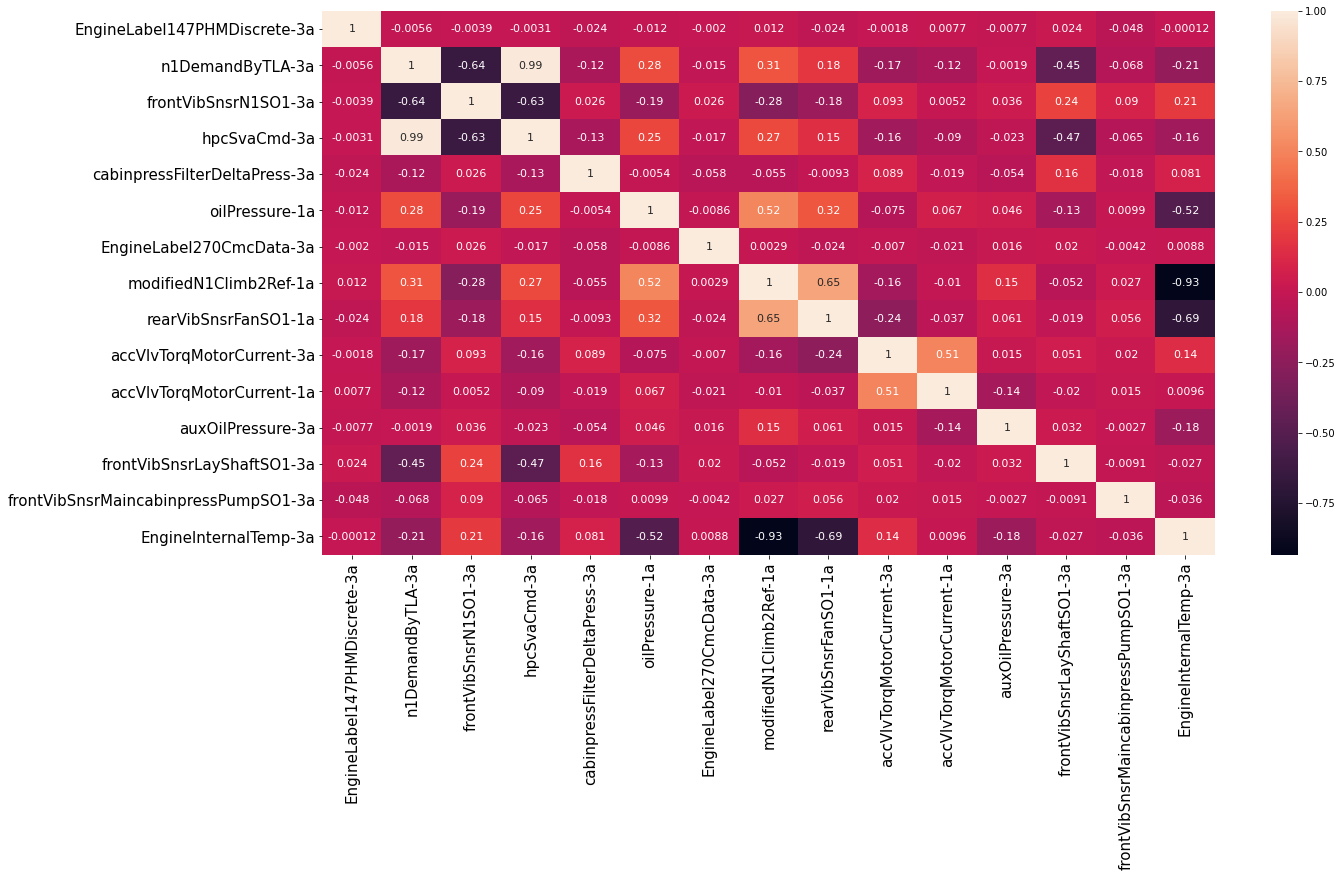

In [60]:
#set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df_feature.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

### checking for multi-collinearity and removing it

In [63]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                              Features
0    69.192948                      n1DemandByTLA-3a
1    65.806618                          hpcSvaCmd-3a
2     7.157422                modifiedN1Climb2Ref-1a
3     7.100935                 EngineInternalTemp-3a
4     2.056889                  rearVibSnsrFanSO1-1a
5     1.845209                  frontVibSnsrN1SO1-3a
6     1.566676             accVlvTorqMotorCurrent-1a
7     1.522803             accVlvTorqMotorCurrent-3a
8     1.481850                        oilPressure-1a
9     1.360662            frontVibSnsrLayShaftSO1-3a
10    1.186660          EngineLabel147PHMDiscrete-3a
11    1.093776                     auxOilPressure-3a
12    1.084027         cabinpressFilterDeltaPress-3a
13    1.025199  frontVibSnsrMaincabinpressPumpSO1-3a
14    1.008202              EngineLabel270CmcData-3a

The output shows that the variable 'n1DemandByTLA-3a' and the next column 'hpcSvaCmd-3a' has the highest VIF. Now, we use the for loop to find VIF and remove the variables with VIF greater than 5. We set the threshold to 5, as we wish to remove the variable for which the remaining variables explain more than 95% of the variation. One can choose the threshold other than 5. (it depends on the business requirements)

In [64]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_num.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

    # create a column of variable names
    vif["Features"] = df_num.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 5]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_num = df_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                              Features
0     1.074118          EngineLabel147PHMDiscrete-3a
1     1.840568                  frontVibSnsrN1SO1-3a
2     2.276231                          hpcSvaCmd-3a
3     1.068081         cabinpressFilterDeltaPress-3a
4     1.391997                        oilPressure-1a
5     1.007081              EngineLabel270CmcData-3a
6     2.321995                modifiedN1Climb2Ref-1a
7     1.780606                  rearVibSnsrFanSO1-1a
8     1.489990             accVlvTorqMotorCurrent-3a
9     1.447137             accVlvTorqMotorCurrent-1a
10    1.076975                     auxOilPressure-3a
11    1.313159            frontVibSnsrLayShaftSO1-3a
12    1.023430  frontVibSnsrMaincabinpressPumpSO1-3a


In [65]:
X = df_num
df2['Fault_Active'] = df2['Fault_Active'].astype(int)
df_target = df2['Fault_Active']

## Train-Test Split

In [68]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'


# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.25)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1499, 13)
y_train (1499,)
X_test (500, 13)
y_test (500,)


#### Create a generalized function to calculate the metrics for the train and the test set.

In [69]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))
    

In [70]:
# create a generalized function to calculate the metrics values for test set
def get_train_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_train)

    # return the performace measures on test set
    return(classification_report(y_train, test_pred))

In [71]:
y_train.dtypes

dtype('int32')

## Decision Tree

#### Build a full decision tree model on a train dataset using 'entropy'.

In [74]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

## Over-fitting in Decision Tree

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

**Calculate performance measures on the train and test set.**

In [76]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374
           1       1.00      1.00      1.00      1125

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499



In [77]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       137
           1       0.92      0.94      0.93       363

    accuracy                           0.90       500
   macro avg       0.88      0.86      0.87       500
weighted avg       0.90      0.90      0.90       500



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [79]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       374
           1       0.93      0.91      0.92      1125

    accuracy                           0.88      1499
   macro avg       0.84      0.85      0.84      1499
weighted avg       0.88      0.88      0.88      1499

Test data:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       137
           1       0.91      0.89      0.90       363

    accuracy                           0.85       500
   macro avg       0.81      0.82      0.82       500
weighted avg       0.86      0.85      0.85       500



**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fitted after specifying some of the hyperparameters.

In [81]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Plot the confusion matrix.

In [82]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [83]:
def plot_confusion_matrix1(model):
    y_pred = model.predict(X_train)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_train, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of the separability of the model.

In [84]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Fault Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## Boosting Methods

The Ensemble technique considers multiple models for predicting the results. `Bagging` and `Boosting` are two of the types of ensembles. The bagging methods construct the multiple models in parallel; whereas, the boosting methods construct the models sequentially.

Earlier, we have studied one of the bagging (bootstrap aggregating) technique i.e. `Random Forest`.

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##  AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

In [87]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

Let us understand the parameters in the `AdaBoostClassifier()`:

`algorithm=SAMME.R`: It is the default boosting algorithm. This algorithm uses predicted class probabilities to build the stumps.

`base_estimator=None`: By default, the estimator is a decision tree with a maximum depth equal to 1 (stump).

`learning_rate=1.0`: It considers the contribution of each estimator in the classifier.

`n_estimators=40`: It is the number of estimators at which boosting is terminated.

`random_state=10`: It returns the same set of samples for each code implementation.

#### PLot the confusion matrix

In [88]:
from matplotlib.colors import ListedColormap

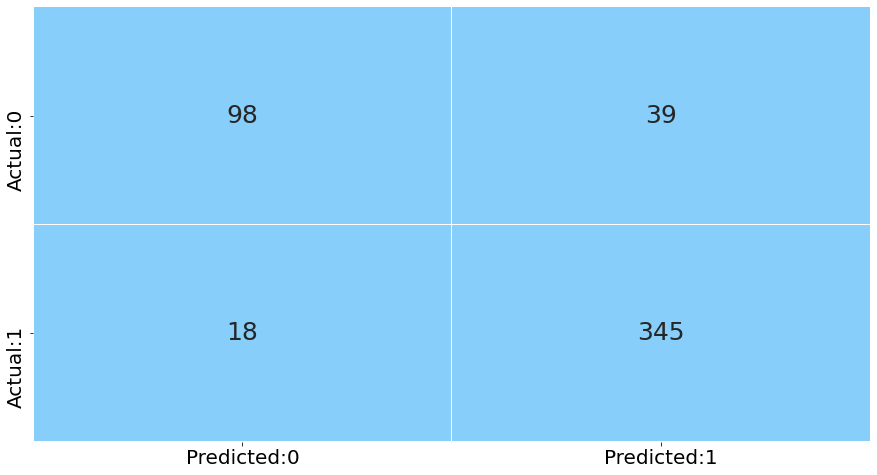

In [89]:
# call the function to plot the confusion matrix
# pass the AdaBoost model to the function
plot_confusion_matrix(ada_model)

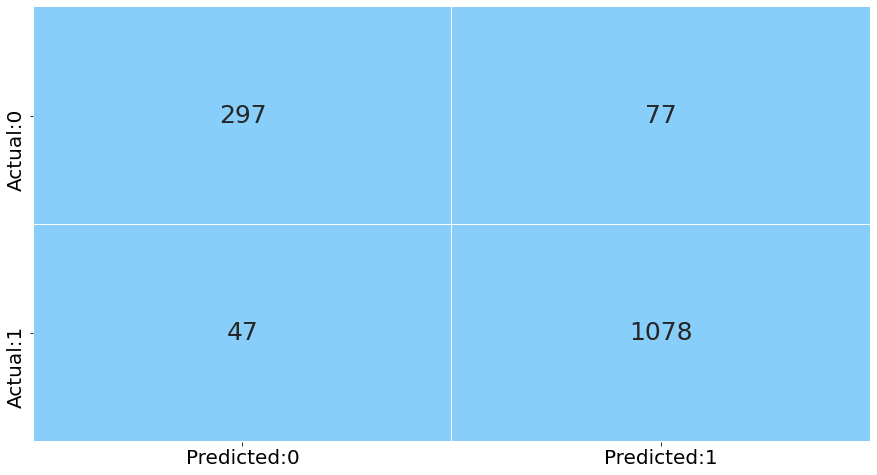

In [90]:
plot_confusion_matrix1(ada_model) #Confusion matrix for trained dataset

#### Calculate the performance measures of the test

In [91]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the AdaBoost model to the function
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       137
           1       0.90      0.95      0.92       363

    accuracy                           0.89       500
   macro avg       0.87      0.83      0.85       500
weighted avg       0.88      0.89      0.88       500



**Interpretation:** The output shows that the model is 89% accurate.

#### Plot the ROC curve.

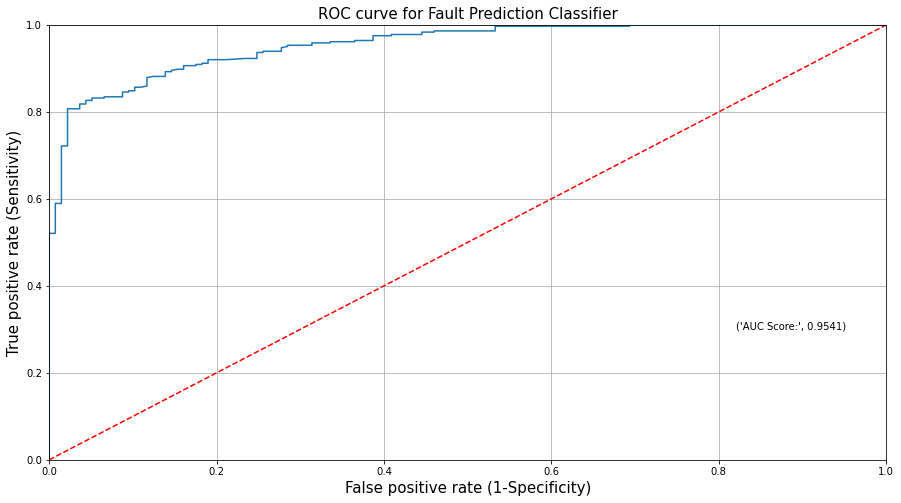

In [93]:
# call the function to plot the ROC curve
# pass the AdaBoost model to the function
plot_roc(ada_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the AdaBoost model is away from the dotted line; with the AUC score 0.9541.

### Gradient Boosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

In [94]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

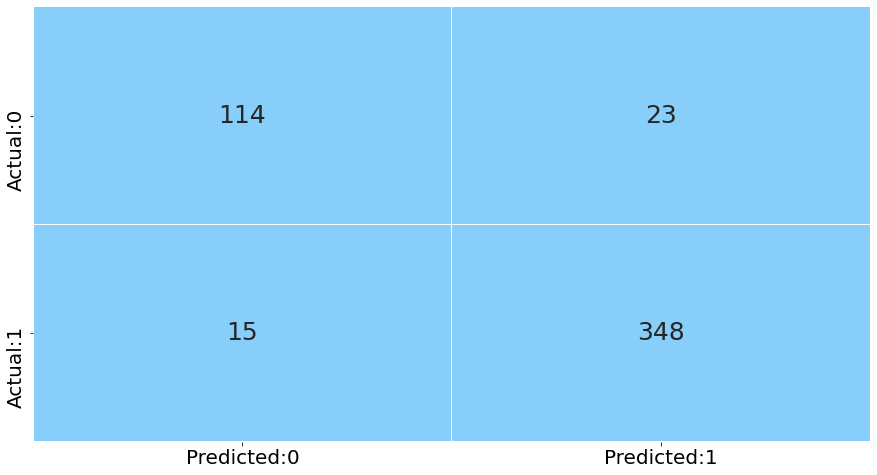

In [95]:
# call the function to plot the confusion matrix
# pass the gradient boosting model to the function
plot_confusion_matrix(gboost_model)

In [96]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the gradient boosting model to the function
train_report = get_train_report(gboost_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374
           1       1.00      1.00      1.00      1125

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499



In [97]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       137
           1       0.94      0.96      0.95       363

    accuracy                           0.92       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.92      0.92      0.92       500



**Interpretation:** The output shows that the model is 91% accurate.

**Also we can notice that there is an over fit of data in the Gboost classifier. Thus we need to perform tuning of hyperparameters to reduce the overfitting of dataset.**
<br>

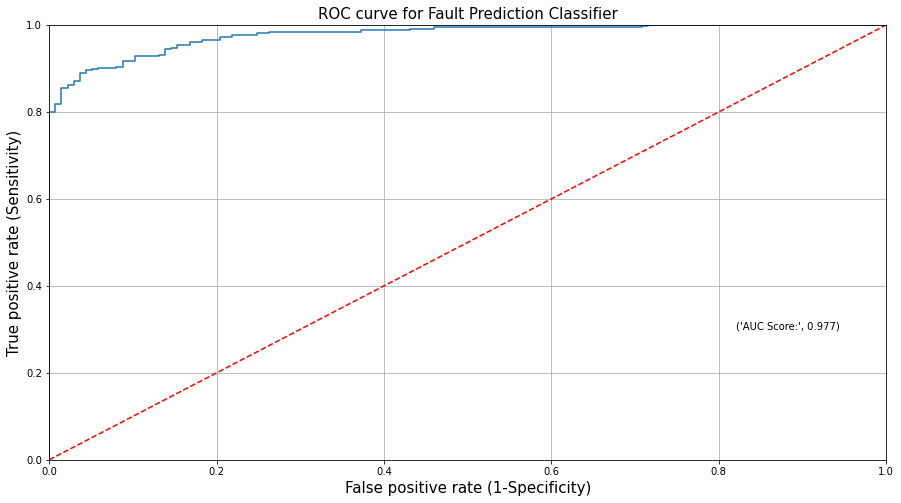

In [99]:
# call the function to plot the ROC curve
# pass the gradient boosting model to the function
plot_roc(gboost_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the AdaBoost model is away from the dotted line; with the AUC score 0.9544.

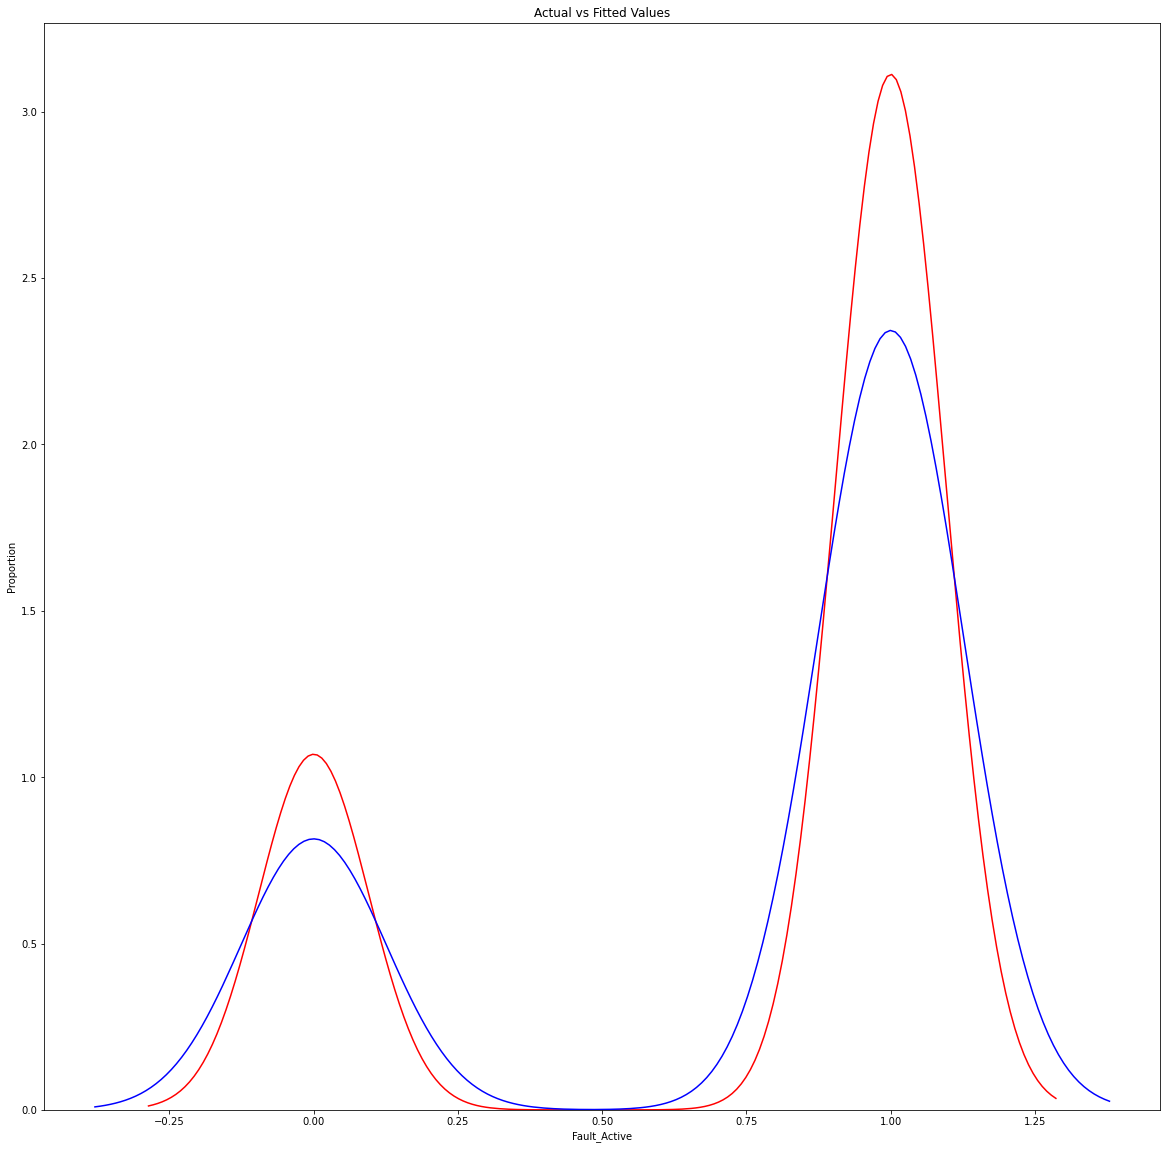

In [101]:
plt.figure(figsize=(20, 20))


ax1 = sns.distplot(df2['Fault_Active'], hist=False, color="r", label="Actual Value")
sns.distplot(gboost_model.predict(X_test), hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Fault_Active')
plt.ylabel('Proportion')

plt.show()
plt.close()

##  Tune the Hyperparameters using GridSearchCV (Decision Tree)

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the ` GridSearchCV()` and build the tree using the optimal values obtained using GridSearch method.

In [102]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2} 



#### Build the model using the tuned hyperparameters.

In [104]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

In [105]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for train set: \n', get_train_report(dt_model))

# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       374
           1       0.92      0.92      0.92      1125

    accuracy                           0.88      1499
   macro avg       0.84      0.84      0.84      1499
weighted avg       0.88      0.88      0.88      1499

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       137
           1       0.90      0.92      0.91       363

    accuracy                           0.87       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.87      0.87      0.87       500



### Applying gboost classifier on the hypertuned parameters

In [106]:
gboost_model_tuned = GradientBoostingClassifier(n_estimators = 150,
                                        max_depth = tree_grid_model.best_params_.get('max_depth'),
                                        max_features = tree_grid_model.best_params_.get('max_features'),
                                        max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                        min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                        min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                        random_state = 10 )

# fit the model using fit() on train data
gboost_model_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=7,
                           n_estimators=150, random_state=10)

In [107]:
# compute the performance measures on train data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
train_report = get_train_report(gboost_model_tuned)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       374
           1       0.98      0.99      0.99      1125

    accuracy                           0.98      1499
   macro avg       0.97      0.97      0.97      1499
weighted avg       0.98      0.98      0.98      1499



In [108]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
test_report = get_test_report(gboost_model_tuned)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       137
           1       0.93      0.95      0.94       363

    accuracy                           0.91       500
   macro avg       0.90      0.88      0.89       500
weighted avg       0.91      0.91      0.91       500



**If you can see the accuracy score of train dataset have been reduced after hypertuning of parameters. Thus after applying boosting techniques with the tuned hyper parameters its evident that the accuracy_score and ROC_score will be more than the actual model.**

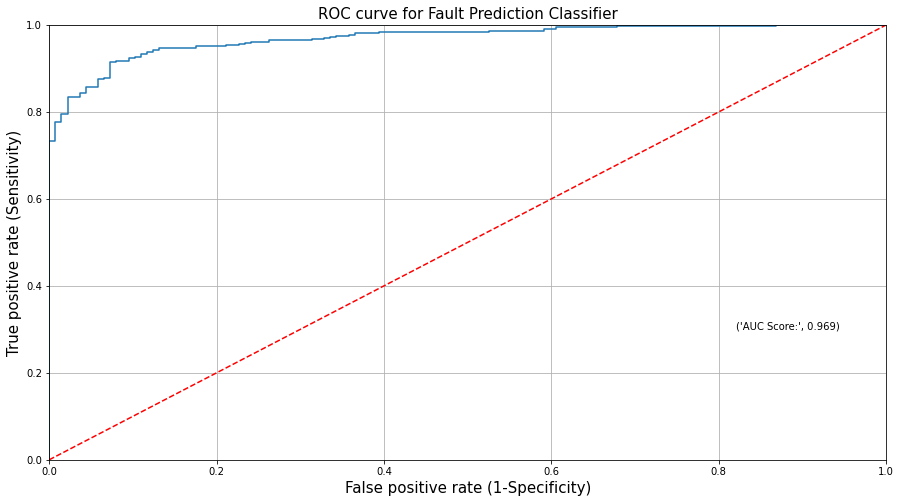

In [109]:
# call the function to plot the ROC curve
# pass the gradient boosting model to the function
plot_roc(gboost_model_tuned)

**We can notice that the AUC_score in ROC curve has also been increased from 0.9544 to 0.969 which implies that recall is more and specificity proportion in this model is less. Thus we can say the gboost model after hypertuning of parameters is an optimal model.**

### Printing Important features

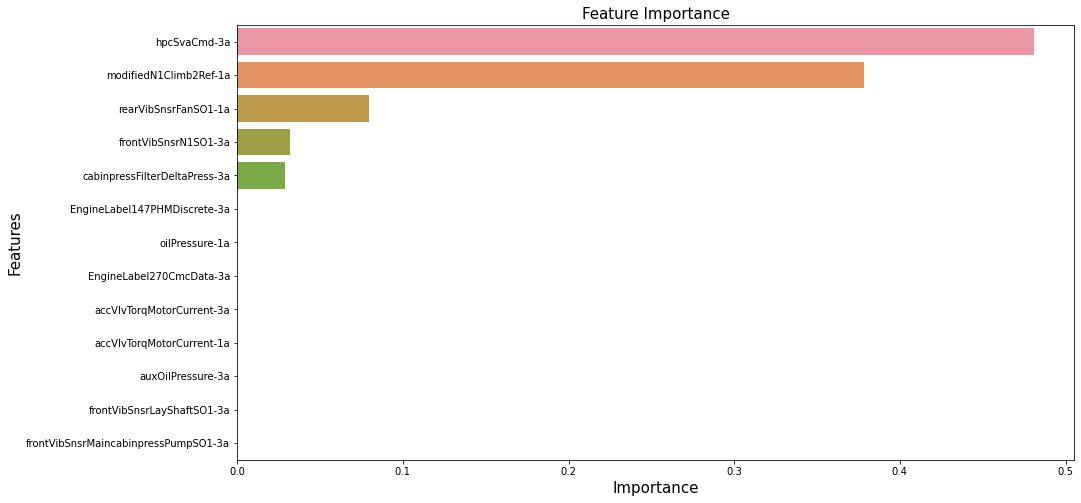

In [110]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()